# Lead Scoring Case Study


We are going to take following approach-

1. Problem Statement
2. Data
3. Modelling
4. Evaluation
5. Experimentation


## 1. Problem Statement
The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.


In [1]:
#Preparing the tools

#Regular EDA and plottig libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Model evaluation, preprocessing libraries
from sklearn.model_selection import train_test_split,cross_validate, cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer,make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#Model
from sklearn.linear_model import LogisticRegression

#Metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, PrecisionRecallDisplay,\
classification_report, precision_score, recall_score,precision_recall_curve

In [2]:
#Setting display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 2. Data

### Load Data

In [3]:
#Importing data
data = pd.read_csv("Leads.csv")

In [4]:
data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [5]:
#Checking dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [13]:
#Checking class imbalance
data.Converted.value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

In [7]:
data.Converted.isna().sum()

0

### Data Exploration

<AxesSubplot:>

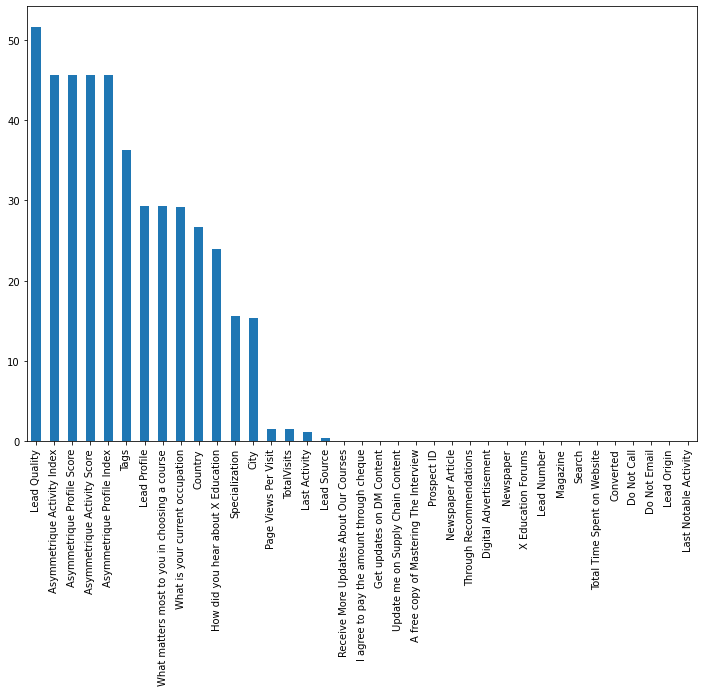

In [9]:
#Checking Null values
((data.isna().sum()/len(data))*100).sort_values(ascending=False).plot.bar(figsize=(12,8))

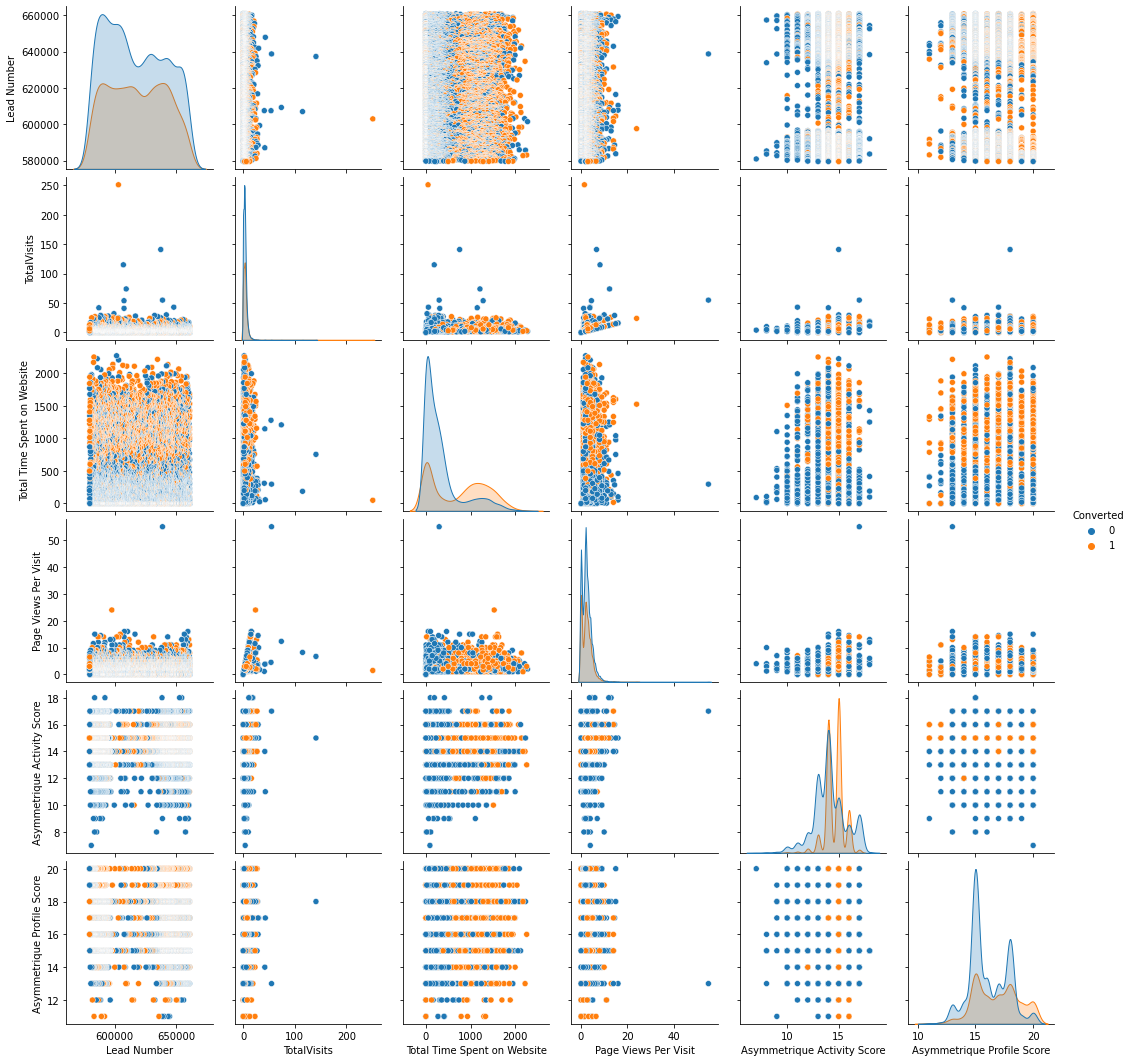

In [51]:
#Checking relation between different varibles and target
sns.pairplot(data,hue='Converted');

<AxesSubplot:>

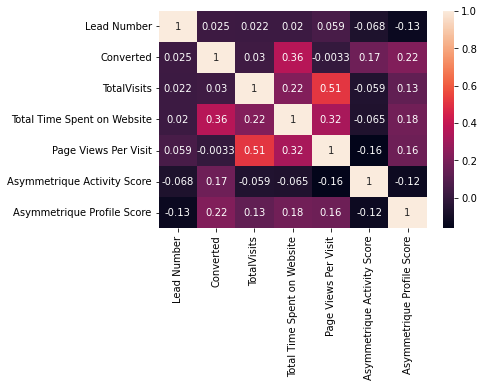

In [52]:
#Checking correlation
sns.heatmap(data.corr(),annot=True);

In [53]:
#Putting Lead Number as index
data.index= data['Lead Number']

In [54]:
#Dropping some irrelevant features initially
data = data.drop(columns=['Prospect ID','Lead Number'],axis=1)

In [55]:
#Separating data into two parts
X = data.drop('Converted',axis=1)
y = data['Converted']

In [56]:
#Splitting Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=101)

In [57]:
#Checking statistics
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,7278.000000,7392.000000,7278.000000,4016.000000,4016.000000
mean,3.464688,486.405303,2.376731,14.300299,16.354084
std,4.825104,545.940400,2.202153,1.382135,1.807863
min,0.000000,0.000000,0.000000,7.000000,11.000000
25%,1.000000,13.000000,1.000000,14.000000,15.000000
50%,3.000000,249.000000,2.000000,14.000000,16.000000
75%,5.000000,933.250000,3.320000,15.000000,18.000000
max,251.000000,2272.000000,55.000000,18.000000,20.000000


### Exploratory Data Analysis

In [58]:
X_train["Lead Source"].value_counts(dropna=False)

Google               2271
Direct Traffic       2055
Olark Chat           1395
Organic Search        923
Reference             426
Welingak Website      111
Referral Sites        108
Facebook               50
NaN                    31
google                  5
bing                    4
Press_Release           2
Social Media            2
Click2call              2
Pay per Click Ads       1
youtubechannel          1
blog                    1
WeLearn                 1
testone                 1
Live Chat               1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [59]:
X_train['TotalVisits'].describe()

count    7278.000000
mean        3.464688
std         4.825104
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [60]:
X_train['Page Views Per Visit'].describe()

count    7278.000000
mean        2.376731
std         2.202153
min         0.000000
25%         1.000000
50%         2.000000
75%         3.320000
max        55.000000
Name: Page Views Per Visit, dtype: float64

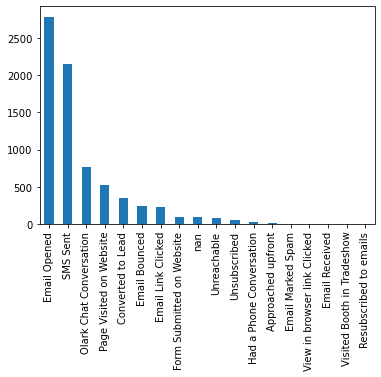

In [61]:
X_train['Last Activity'].value_counts(dropna=False).plot.bar();

In [62]:
X_train[X_train['TotalVisits'].isnull()]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
585438,Lead Add Form,Reference,No,No,NaN,1458,NaN,NaN,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,High in Relevance,No,No,Select,Select,02.Medium,01.High,14.0,17.0,No,No,Modified
588097,Lead Add Form,Reference,No,No,NaN,711,NaN,Had a Phone Conversation,NaN,Marketing Management,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Select,02.Medium,01.High,13.0,19.0,No,No,Modified
605006,Lead Add Form,Reference,No,No,NaN,304,NaN,NaN,NaN,Human Resource Management,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Thane & Outskirts,NaN,NaN,NaN,NaN,No,No,Modified
601100,Lead Add Form,Reference,No,No,NaN,1476,NaN,NaN,NaN,Finance Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,High in Relevance,No,No,Potential Lead,Mumbai,NaN,NaN,NaN,NaN,No,No,Modified
588013,Lead Add Form,Reference,No,No,NaN,1203,NaN,NaN,NaN,"Banking, Investment And Insurance",Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Select,02.Medium,01.High,14.0,19.0,No,No,Modified
597366,Lead Add Form,Reference,Yes,No,NaN,266,NaN,Email Bounced,NaN,International Business,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,NaN,NaN,NaN,NaN,No,No,Modified
617035,Lead Add Form,Reference,No,No,NaN,1010,NaN,NaN,NaN,Marketing Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,High in Relevance,No,No,Potential Lead,Mumbai,NaN,NaN,NaN,NaN,No,No,Modified
654187,Lead Import,Facebook,No,No,NaN,1012,NaN,NaN,NaN,Healthcare Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,02.Medium,14.0,13.0,No,No,Modified
604411,Lead Add Form,Reference,No,No,NaN,1385,NaN,NaN,NaN,Marketing Management,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,Low in Relevance,No,No,Student of SomeSchool,Other Cities,NaN,NaN,NaN,NaN,No,No,Modified


In [63]:
X_train['Page Views Per Visit'].describe()

count    7278.000000
mean        2.376731
std         2.202153
min         0.000000
25%         1.000000
50%         2.000000
75%         3.320000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [64]:
X_train['Specialization'].value_counts(dropna=False)

Select                               1531
NaN                                  1138
Finance Management                    788
Marketing Management                  690
Human Resource Management             664
Operations Management                 405
Business Administration               319
IT Projects Management                287
Supply Chain Management               285
Banking, Investment And Insurance     263
Travel and Tourism                    169
Media and Advertising                 169
International Business                148
Healthcare Management                 125
Hospitality Management                 96
E-COMMERCE                             90
Retail Management                      79
Rural and Agribusiness                 62
E-Business                             50
Services Excellence                    34
Name: Specialization, dtype: int64

In [65]:
X_train['City'].value_counts(dropna=False)

Mumbai                         2601
Select                         1769
NaN                            1123
Thane & Outskirts               620
Other Cities                    554
Other Cities of Maharashtra     360
Other Metro Cities              302
Tier II Cities                   63
Name: City, dtype: int64

In [66]:
X_train['How did you hear about X Education'].value_counts(dropna=False)

Select                   4044
NaN                      1775
Online Search             638
Word Of Mouth             262
Student of SomeSchool     252
Other                     144
Multiple Sources          125
Advertisements             59
Social Media               53
Email                      23
SMS                        17
Name: How did you hear about X Education, dtype: int64

In [67]:
X_train['Country'].value_counts(dropna=False)

India                   5194
NaN                     1969
United States             50
United Arab Emirates      44
Singapore                 21
Saudi Arabia              16
United Kingdom            12
Australia                 12
Qatar                      8
Bahrain                    7
France                     5
Oman                       4
Hong Kong                  4
Canada                     4
unknown                    4
Nigeria                    3
Germany                    3
Kuwait                     3
Sweden                     3
South Africa               3
Ghana                      2
Belgium                    2
Netherlands                2
Asia/Pacific Region        2
Italy                      2
Uganda                     2
Philippines                2
Liberia                    1
Vietnam                    1
Sri Lanka                  1
Indonesia                  1
Tanzania                   1
Malaysia                   1
China                      1
Denmark       

In [68]:
X_train['What is your current occupation'].value_counts(dropna=False)

Unemployed              4463
NaN                     2168
Working Professional     572
Student                  163
Other                     10
Businessman                8
Housewife                  8
Name: What is your current occupation, dtype: int64

In [69]:
X_train['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      5207
NaN                          2183
Flexibility & Convenience       2
Name: What matters most to you in choosing a course, dtype: int64

In [70]:
X_train['Lead Profile'].value_counts(dropna=False)

Select                         3309
NaN                            2183
Potential Lead                 1284
Other Leads                     393
Student of SomeSchool           190
Lateral Student                  17
Dual Specialization Student      16
Name: Lead Profile, dtype: int64

In [71]:
X_train['Tags'].value_counts(dropna=False)

NaN                                                  2700
Will revert after reading the email                  1640
Ringing                                               952
Interested in other courses                           407
Already a student                                     372
Closed by Horizzon                                    293
switched off                                          192
Busy                                                  153
Lost to EINS                                          143
Not doing further education                           118
Interested  in full time MBA                           98
Graduation in progress                                 93
invalid number                                         65
Diploma holder (Not Eligible)                          53
wrong number given                                     32
opp hangup                                             27
number not provided                                    19
in touch with 

In [72]:
X_train['Asymmetrique Activity Index'].value_counts(dropna=False)

NaN          3376
02.Medium    3076
01.High       646
03.Low        294
Name: Asymmetrique Activity Index, dtype: int64

In [73]:
X_train['Asymmetrique Activity Score'].value_counts(dropna=False)

NaN     3376
14.0    1409
15.0    1046
13.0     621
16.0     371
17.0     270
12.0     160
11.0      80
10.0      44
9.0        6
18.0       5
8.0        3
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [74]:
X_train['Asymmetrique Profile Score'].value_counts(dropna=False)

NaN     3376
15.0    1382
18.0     874
16.0     489
17.0     462
20.0     244
19.0     193
14.0     185
13.0     163
12.0      18
11.0       6
Name: Asymmetrique Profile Score, dtype: int64

In [75]:
X_train['Asymmetrique Profile Index'].value_counts(dropna=False)

NaN          3376
02.Medium    2219
01.High      1773
03.Low         24
Name: Asymmetrique Profile Index, dtype: int64

In [76]:
X_train['Lead Quality'].value_counts(dropna=False)

NaN                  3839
Might be             1228
Not Sure              864
High in Relevance     523
Worst                 471
Low in Relevance      467
Name: Lead Quality, dtype: int64

### Imputing missing values

> **Imputation strategy**
* Different feature requires different type of imputation.
* Features which are in *most_freq_imputer_cols* are features which are imputed with most frequent value in that column, these features have less number of nan values
* Features which are in *median_imputer_cols* are features which are imputed with median value in that column, these features also have less number of nan values
* Features which are in *missing_imputer_cols* are features which are imputed with constant value -'missing', as these features have more  number of nan values, instead of dropping, imputting with missing value will only indicate the presence of missing values 
* Features which are in *num_imputer_cols* are features which are imputed with constant value '-1', as these features have more  number of nan values, instead of dropping, imputting with missing value will indicate the presence of missing values 

In [77]:
#Columns containing nan values
most_freq_imputer_cols = ['Lead Source','Last Activity']
median_imputer_cols = ['Page Views Per Visit','TotalVisits']
missing_imputer_cols = ['Lead Quality','Lead Profile',
                        'What matters most to you in choosing a course','What is your current occupation',
                        'Asymmetrique Activity Index','Tags','Asymmetrique Profile Index','Specialization',
                       'City','How did you hear about X Education','Country'] 
num_imputer_cols = ['Asymmetrique Activity Score','Asymmetrique Profile Score']

In [78]:
#Imputers
most_freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy="median")
missing_imputer = SimpleImputer(strategy='constant',fill_value='missing')
num_imputer = SimpleImputer(strategy='constant',fill_value=-1)

In [79]:
#Combining all imputers
imputer = ColumnTransformer([
    ("most_freq_imputer", most_freq_imputer, most_freq_imputer_cols),
    ("median_imputer_cols", median_imputer, median_imputer_cols),
    ("missing_imputer", missing_imputer, missing_imputer_cols),
    ("nan_imputer", num_imputer, num_imputer_cols)],
     remainder='passthrough')

In [80]:
#Imputing nan values
imputed_X_train=imputer.fit_transform(X_train)
imputed_X_test= imputer.transform(X_test)

In [81]:
#Making dataframe with imputed values
remaining_cols=[]
for i in list(imputer.transformers_)[-1][2]:
    remaining_cols.append(X_train.columns[i])
    
columns_after_imputed=most_freq_imputer_cols+median_imputer_cols+missing_imputer_cols+num_imputer_cols+remaining_cols

imputed_X_train=pd.DataFrame(imputed_X_train,columns=columns_after_imputed)
imputed_X_test=pd.DataFrame(imputed_X_test,columns=columns_after_imputed)

In [82]:
#Merging 'Select' value into 'missing' term
column_containing_select=[]
for col in imputed_X_train.columns:
    if imputed_X_train[col].astype(str).str.contains('Select').any():
        column_containing_select.append(col)
        
for col in column_containing_select:
    imputed_X_train[col] = imputed_X_train[col].replace('Select','missing')

In [83]:
#Numerical features
num_cols=[]
for col in X_train.columns:
    if X_train[col].dtypes == np.number:
        num_cols.append(col)
num_cols

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9788\2388139630.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if X_train[col].dtypes == np.number:


['TotalVisits',
 'Page Views Per Visit',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [84]:
for col in imputed_X_train.columns:
    if col in num_cols:
        imputed_X_train[col]=imputed_X_train[col].astype("float64")

### Preprocessing

In [85]:
#Preprocessing
pre_pipeline = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),make_column_selector(dtype_include=object)),
    (StandardScaler(),make_column_selector(dtype_include =np.number)),
    verbose_feature_names_out=False
)

### 3. Modelling

In [86]:
#Pipeline of preprocessing and logistic regression
lg_pipe =  make_pipeline(pre_pipeline, LogisticRegression(max_iter=1000,random_state=101))

In [87]:
# Cross-validation
cross_validate(lg_pipe,imputed_X_train,y_train,cv=5,return_train_score=True)

{'fit_time': array([0.34607434, 0.31419468, 0.28825927, 0.30719471, 0.2922163 ]),
 'score_time': array([0.02094865, 0.01794958, 0.01894951, 0.01895094, 0.0179522 ]),
 'test_score': array([0.94117647, 0.94117647, 0.94181326, 0.94316644, 0.92151556]),
 'train_score': array([0.95383054, 0.95230847, 0.95231654, 0.95164018, 0.95688197])}

**Analysis**
* We can see, there is no over or under fitting, model is generalizing well.

### 4. Evaluation

In [88]:
y_pred = cross_val_predict(lg_pipe,imputed_X_train,y_train)

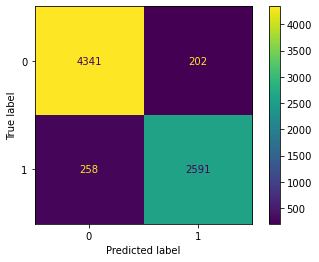

In [89]:
#Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_train,y_pred);

In [90]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4543
           1       0.93      0.91      0.92      2849

    accuracy                           0.94      7392
   macro avg       0.94      0.93      0.93      7392
weighted avg       0.94      0.94      0.94      7392



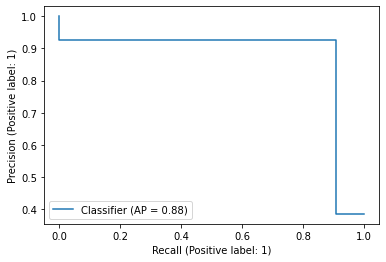

In [91]:
#Precision-Recall Curve
PrecisionRecallDisplay.from_predictions(y_train,y_pred);

**Analysis**
* As mentioned in case-study problem statement "X Education has appointed us to help them select the most promising leads,
i.e. the leads that are most likely to convert into paying customers." 
* This above statement means that we need to have a **high precision**.
* We can see, around Precision = 0.92, we are getting high Precision and high recall as well.

### Changing threshold for increased precision
* We can also increase precision by changing threshold.
* Here, we are changing threshold so that precision becomes very high.

In [92]:
y_pred = cross_val_predict(lg_pipe,imputed_X_train,y_train,method='decision_function')

precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred)

threshold_98_precision = thresholds[np.argmax(precisions >= 0.98)]
y_train_pred_98 = (y_pred >= threshold_98_precision)

In [93]:
precision_score(y_train,y_train_pred_98)

0.9802176063303659

In [94]:
recall_score(y_train,y_train_pred_98)

0.6956826956826957

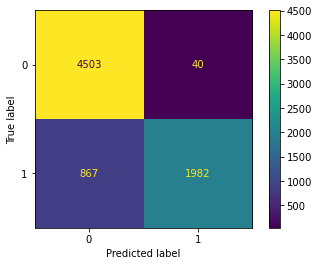

In [95]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred_98);

> **Analysis**
> * As we can see in above confusion matrix, False postive has decrease from 202 to 40 which is the indicator of high precision.

### Predictions on test data

In [96]:
lg_pipe.fit(imputed_X_train,y_train)
y_test_pred = lg_pipe.decision_function(imputed_X_test)

In [97]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_pred)

threshold_98_precision = thresholds[np.argmax(precisions >= 0.98)]
y_test_pred_98 = (y_test_pred >= threshold_98_precision)

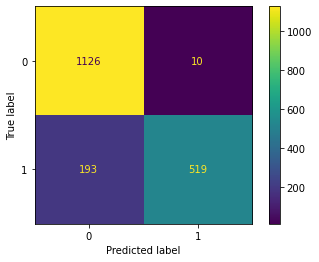

In [98]:
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred_98);

In [99]:
#Prediction score
lg_pipe.fit(imputed_X_train,y_train)
lg_pipe.score(imputed_X_test,y_test)

0.9296536796536796

### Important Features

In [100]:
lg_pipe.fit(imputed_X_train,y_train)

feature_names = lg_pipe[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    lg_pipe[-1].coef_.reshape(1856, 1),
    columns=["Coefficients"],
    index=feature_names,
)

coefs.sort_values(by='Coefficients',ascending=True)[:20]

,Coefficients
Tags_Ringing,-3.082254
Tags_switched off,-2.693963
Tags_Already a student,-2.040926
Tags_wrong number given,-1.879755
Tags_invalid number,-1.878120
Tags_Interested in other courses,-1.606681
Total Time Spent on Website_83,-1.512293
Total Time Spent on Website_33,-1.486794
Asymmetrique Profile Score,-1.467137
Lead Quality_Worst,-1.447023
